In [1]:
%pylab inline
import ipywidgets as wgt
from ipywidgets import Label

Populating the interactive namespace from numpy and matplotlib


## LS 2 Ground Array - Balloon Equivalent

In [2]:
data1 = np.genfromtxt("70_200hz.txt", autostrip = True)
datax1, datay1 = data1[0],data1[1]


"""
Channel 1
"""
data9 = np.genfromtxt("LS2CH1_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch1_0x, ls2_ch1_0y = data9[:,0],data9[:,1]
data10 = np.genfromtxt("LS2CH1_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch1_1x, ls2_ch1_1y = data10[:,0],data10[:,1]

"""
Channel 2
"""
data11 = np.genfromtxt("LS2CH2_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch2_0x, ls2_ch2_0y = data11[:,0],data11[:,1]
data12 = np.genfromtxt("LS2CH2_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch2_1x, ls2_ch2_1y = data12[:,0],data12[:,1]

"""
Channel 3
"""
data13 = np.genfromtxt("LS2CH3_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch3_0x, ls2_ch3_0y = data13[:,0],data13[:,1]
data14 = np.genfromtxt("LS2CH3_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch3_1x, ls2_ch3_1y = data14[:,0],data14[:,1]

"""
Channel 4
"""
data15 = np.genfromtxt("LS2CH4_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch4_0x, ls2_ch4_0y = data15[:,0],data15[:,1]
data16 = np.genfromtxt("LS2CH4_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch4_1x, ls2_ch4_1y = data16[:,0],data16[:,1]



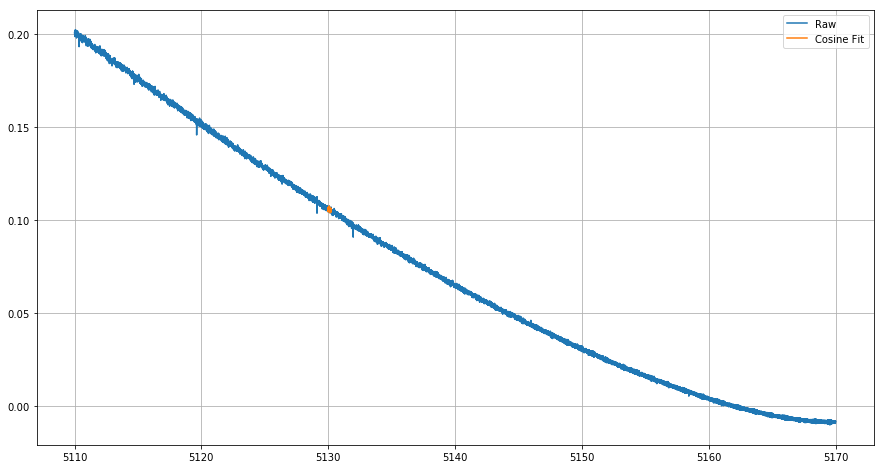

In [3]:
seconds = .25
startt = 20 
start = int(startt*600)
end = int(seconds*600)

tchunk1=ls2_ch1_0x[start:start+end]
vchunk1=ls2_ch1_0y[start:start+end]

#tchunk1 = datax1[1510:1570]
#vchunk1 = datay1[1510:1570]

"""
tchunk1 = datax1[6320:6380]
vchunk1 = datay1[6320:6380]
"""

plt.figure(figsize=(15,8))
plt.grid()
plt.plot(ls2_ch1_0x,ls2_ch1_0y,label="Raw")
plt.plot(tchunk1,vchunk1,label="Cosine Fit")
plt.legend()
plt.show()

In [4]:
Frequency1 = wgt.FloatSlider(description=r'$f_1$', value=60.0, min=30, max=100, step=10)
Amplitude1 = wgt.FloatSlider(description=r'$A_1$', value=.0007,min=0, max=.002, step=0.0001)
Phase1 = wgt.FloatSlider(description=r'$\phi_1$', value=0.0, min=-2*pi, max=2*np.pi, step=.5)

Frequency2 = wgt.FloatSlider(description=r'$f_2$',value=60.0, min=30, max=100, step=10)
Amplitude2 = wgt.FloatSlider(description=r'$A_2$', value=0.0009,min=0, max=.002, step=0.0001)
Phase2 = wgt.FloatSlider(description=r'$\phi_2$', value=-1.28,min=-2*pi, max=2*np.pi, step=.5)

Frequency3 = wgt.FloatSlider(description=r'$f_3$', value = 120, min=30, max=300, step=30)
Amplitude3 = wgt.FloatSlider(description=r'$A_3$', value = .0003, min=0, max=.002, step=0.0001)
Phase3 = wgt.FloatSlider(description=r'$\phi_3$', min=-2*pi, max=2*np.pi, step=.5)
@wgt.interact(F1=Frequency1,A1=Amplitude1, Phi1 = Phase1,F2=Frequency2,A2=Amplitude2, Phi2 = Phase2,
              F3=Frequency3,A3=Amplitude3, Phi3 = Phase3)
def plot_sinefit2(F1,A1,Phi1,F2,A2,Phi2,F3,A3,Phi3):
    x=tchunk1
    y=vchunk1
    print("Freq 1:", F1,"A 1:",A1, "Phi 1:",Phi1)
    print("Freq 2:", F2,"A 2:",A2, "Phi 2:",Phi2)
    print("Freq 3:", F3,"A 3:",A3, "Phi 3:",Phi3)
    
    f = plt.figure(figsize=(16,8))
    ax = f.add_subplot(211)
    ax.plot(x,y,label="Data")
    #ax.plot(x, A1*np.cos(2*np.pi*F1*x + Phi1)+mean(y),alpha=0.7,label="Fit 1")
    #ax.plot(x, A2*np.cos(2*np.pi*F2*x + Phi2)+mean(y),alpha=0.7,label="Fit 2")
    plt.plot(x, A3*np.cos(2*np.pi*F3*x + Phi3)+mean(y),alpha=0.7,label="Fit 3")
    ax.legend()
    ax.grid()
    
    #"""
    ax2 = f.add_subplot(212)
    #ax2.plot(x,y,label="Data")
    y1 = y/(A1*np.cos(2*np.pi*F1*x + Phi1)+mean(y))
    y2 = y/(A2*np.cos(2*np.pi*F2*x + Phi2)+mean(y))
    #ax2.plot(x,y1,alpha=0.7,label="Fit 1")
    ax2.plot(x, y2 ,alpha=0.7,label="Fit 2")
    ax2.grid()
    #plt.plot(x, A3*np.cos(2*np.pi*F3*x + Phi3)+mean(y),alpha=0.7,label="Fit 3")
    #"""
    
    
    plt.show()
    
    
"""
seconds = .25
startt = 20

F1 = 60
A1 = .0007
Phi1 = 0.0

F2 = 60
A2 = .0009
Phi2 = -1.28
"""


'\nseconds = .25\nstartt = 20\n\nF1 = 60\nA1 = .0007\nPhi1 = 0.0\n\nF2 = 60\nA2 = .0009\nPhi2 = -1.28\n'

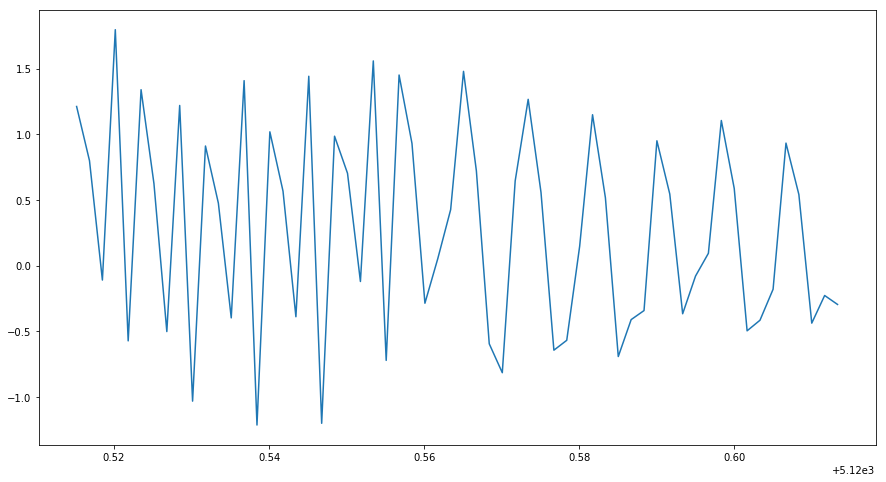

In [5]:
x = tchunk1
y = vchunk1
A1 = .0007
F1 = 60.0
Phi1 = 0

norm_y = vchunk1/(A1*np.cos(2*np.pi*F1*x + Phi1)+np.mean(y))

plt.figure(figsize=(15,8))
#plt.plot(x,y,label="Raw")
plt.plot(x,norm_y,label="Divided")